In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.options.mode.chained_assignment = None
%matplotlib inline

## 台灣鳳梨基本情報

- **2011~2019 產量＆種植面積（折線-產量(ton)、直方-種植面積(公頃)）**

<img src="image/Pineapple area & production.jpg" width=500 height=500>

- **2011~ 2020 全國市場年度價格＆交易量（折線-價格(NTD/kg)、直方-交易量(kg)）**

<img src="image/全國鳳梨各年度價格＆交易量.jpg" width=1500 height=1200>


### 讀取檔案

In [2]:
df_pineapple = pd.read_csv("analysis data/鳳梨分析資料.csv")
df_pineapple.head()

,日期,產品,平均價(元/公斤),交易量(公斤),平均地溫100cm(℃),平均氣壓(hPa),平均氣溫(℃),平均相對溼度( %),累積日射量(MJm2),累積日照時數(hr),累計雨量(mm),5日平均地溫100cm(℃),5日平均累積日照時數(hr),3日累計雨量(mm)
0,2011-01-06,B2 鳳梨 金鑽鳳梨,18.4,2354,23.7,1013.3,18.5,85.0,4.05,0.0,0.5,24.1,3.8,0.0
1,2011-01-07,B2 鳳梨 金鑽鳳梨,18.5,11185,23.6,1015.5,14.8,82.0,2.46,0.0,0.0,24.0,7.3,0.0
2,2011-01-08,B2 鳳梨 金鑽鳳梨,18.1,10245,23.5,1013.4,17.9,78.0,8.11,7.3,0.0,23.9,6.4,0.0
3,2011-01-09,B2 鳳梨 金鑽鳳梨,18.6,7986,23.5,1011.7,19.6,77.0,7.43,5.9,0.0,23.8,8.3,0.5
4,2011-01-10,B2 鳳梨 金鑽鳳梨,18.6,7986,23.4,1011.8,17.6,77.0,5.39,2.1,0.0,23.7,4.1,0.0


#### 讀取過後，資料型態被自動轉換 => 再次轉換回來

In [3]:
df_pineapple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   日期              3772 non-null   object 
 1   產品              3772 non-null   object 
 2   平均價(元/公斤)       3772 non-null   float64
 3   交易量(公斤)         3772 non-null   int64  
 4   平均地溫100cm(℃)    3772 non-null   float64
 5   平均氣壓(hPa)       3772 non-null   float64
 6   平均氣溫(℃)         3772 non-null   float64
 7   平均相對溼度( %)      3772 non-null   float64
 8   累積日射量(MJm2)     3772 non-null   float64
 9   累積日照時數(hr)      3772 non-null   float64
 10  累計雨量(mm)        3772 non-null   float64
 11  5日平均地溫100cm(℃)  3772 non-null   float64
 12  5日平均累積日照時數(hr)  3772 non-null   float64
 13  3日累計雨量(mm)      3772 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 412.7+ KB


### 數值型資料（Numerical data distribution）

In [4]:
df_num = df_pineapple.select_dtypes(include=["int64", "float64"])
df_num.head()

,平均價(元/公斤),交易量(公斤),平均地溫100cm(℃),平均氣壓(hPa),平均氣溫(℃),平均相對溼度( %),累積日射量(MJm2),累積日照時數(hr),累計雨量(mm),5日平均地溫100cm(℃),5日平均累積日照時數(hr),3日累計雨量(mm)
0,18.4,2354,23.7,1013.3,18.5,85.0,4.05,0.0,0.5,24.1,3.8,0.0
1,18.5,11185,23.6,1015.5,14.8,82.0,2.46,0.0,0.0,24.0,7.3,0.0
2,18.1,10245,23.5,1013.4,17.9,78.0,8.11,7.3,0.0,23.9,6.4,0.0
3,18.6,7986,23.5,1011.7,19.6,77.0,7.43,5.9,0.0,23.8,8.3,0.5
4,18.6,7986,23.4,1011.8,17.6,77.0,5.39,2.1,0.0,23.7,4.1,0.0


In [5]:
# 變換欄位順序 => 把average price拉出來放在最後一欄
# col_target = list(df_num["平均價(元/公斤)"])
# df_num.drop(columns="平均價(元/公斤)", inplace=True)
# df_num.insert(-1, "平均價(元/公斤)", col_target)

cols = list(df_num.columns)
df_num = df_num[ cols[1:] + [cols[0]] ]
df_num

,交易量(公斤),平均地溫100cm(℃),平均氣壓(hPa),平均氣溫(℃),平均相對溼度( %),累積日射量(MJm2),累積日照時數(hr),累計雨量(mm),5日平均地溫100cm(℃),5日平均累積日照時數(hr),3日累計雨量(mm),平均價(元/公斤)
0,2354,23.7,1013.3,18.5,85.0,4.05,0.0,0.5,24.1,3.8,0.0,18.4
1,11185,23.6,1015.5,14.8,82.0,2.46,0.0,0.0,24.0,7.3,0.0,18.5
2,10245,23.5,1013.4,17.9,78.0,8.11,7.3,0.0,23.9,6.4,0.0,18.1
3,7986,23.5,1011.7,19.6,77.0,7.43,5.9,0.0,23.8,8.3,0.5,18.6
4,7986,23.4,1011.8,17.6,77.0,5.39,2.1,0.0,23.7,4.1,0.0,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3767,163380,28.0,1003.0,28.5,82.0,28.39,9.7,3.5,29.1,4.6,16.0,21.0
3768,87697,28.0,1003.9,28.4,85.0,27.08,9.2,14.5,28.3,0.4,0.0,21.1
3769,82402,28.0,1006.4,28.8,82.0,26.11,8.6,0.5,28.4,9.8,41.5,20.3
3770,85591,28.1,1006.1,29.5,77.0,31.76,11.4,3.0,28.3,10.5,3.5,19.4


### Normalization()

In [6]:
# 平均溫度
import pandas as pd
from sklearn import preprocessing

x = np.reshape(df_num["平均氣溫(℃)"].values, (-1, 1))
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_num["平均氣溫(℃)"] = pd.DataFrame(x_scaled)

In [7]:
# 交易量(公斤)
x = np.reshape(df_num["交易量(公斤)"].values, (-1, 1))
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_num["交易量(公斤)"] = pd.DataFrame(x_scaled)

In [8]:
df_num

,交易量(公斤),平均地溫100cm(℃),平均氣壓(hPa),平均氣溫(℃),平均相對溼度( %),累積日射量(MJm2),累積日照時數(hr),累計雨量(mm),5日平均地溫100cm(℃),5日平均累積日照時數(hr),3日累計雨量(mm),平均價(元/公斤)
0,-1.159079,23.7,1013.3,-1.676002,85.0,4.05,0.0,0.5,24.1,3.8,0.0,18.4
1,-0.940984,23.6,1015.5,-2.616970,82.0,2.46,0.0,0.0,24.0,7.3,0.0,18.5
2,-0.964199,23.5,1013.4,-1.828592,78.0,8.11,7.3,0.0,23.9,6.4,0.0,18.1
3,-1.019988,23.5,1011.7,-1.396255,77.0,7.43,5.9,0.0,23.8,8.3,0.5,18.6
4,-1.019988,23.4,1011.8,-1.904886,77.0,5.39,2.1,0.0,23.7,4.1,0.0,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3767,2.817708,28.0,1003.0,0.867154,82.0,28.39,9.7,3.5,29.1,4.6,16.0,21.0
3768,0.948599,28.0,1003.9,0.841723,85.0,27.08,9.2,14.5,28.3,0.4,0.0,21.1
3769,0.817831,28.0,1006.4,0.943449,82.0,26.11,8.6,0.5,28.4,9.8,41.5,20.3
3770,0.896588,28.1,1006.1,1.121470,77.0,31.76,11.4,3.0,28.3,10.5,3.5,19.4


In [9]:
# 欄位改成英文
df_num.columns = ["volume(kg)", "Avg_Temp 100cm(℃)", "Avg_pressure(hpa)", "Avg_temp", 
                  "Avg_humidity", "Accum_solar(MJm2)", "Accum_solar_time(hr)", "Accum_rain(mm)",
                  "5d Avg_Temp 100cm(℃)", "5d Accum_solar_time(hr)", "3d Accum_rain(mm)", "Avg_price(NTD/kg)"]

In [10]:
df_num[df_num["Accum_rain(mm)"] == 0]

,volume(kg),Avg_Temp 100cm(℃),Avg_pressure(hpa),Avg_temp,Avg_humidity,Accum_solar(MJm2),Accum_solar_time(hr),Accum_rain(mm),5d Avg_Temp 100cm(℃),5d Accum_solar_time(hr),3d Accum_rain(mm),Avg_price(NTD/kg)
1,-0.940984,23.6,1015.5,-2.616970,82.0,2.46,0.0,0.0,24.0,7.3,0.0,18.5
2,-0.964199,23.5,1013.4,-1.828592,78.0,8.11,7.3,0.0,23.9,6.4,0.0,18.1
3,-1.019988,23.5,1011.7,-1.396255,77.0,7.43,5.9,0.0,23.8,8.3,0.5,18.6
4,-1.019988,23.4,1011.8,-1.904886,77.0,5.39,2.1,0.0,23.7,4.1,0.0,18.6
7,-1.101882,23.3,1011.9,-1.854023,85.0,6.57,3.9,0.0,23.5,7.3,0.0,18.6
...,...,...,...,...,...,...,...,...,...,...,...,...
3754,0.771549,29.9,1005.7,1.375786,72.0,33.12,11.5,0.0,29.8,9.1,66.0,21.8
3759,0.856999,29.3,1004.4,1.248628,75.0,38.04,11.7,0.0,29.9,11.5,54.5,21.7
3760,0.856999,29.2,1002.8,1.401217,70.0,33.99,11.6,0.0,29.9,10.3,0.5,21.7
3765,2.288140,28.3,1005.7,0.867154,78.0,23.34,10.5,0.0,29.2,11.6,83.0,21.0


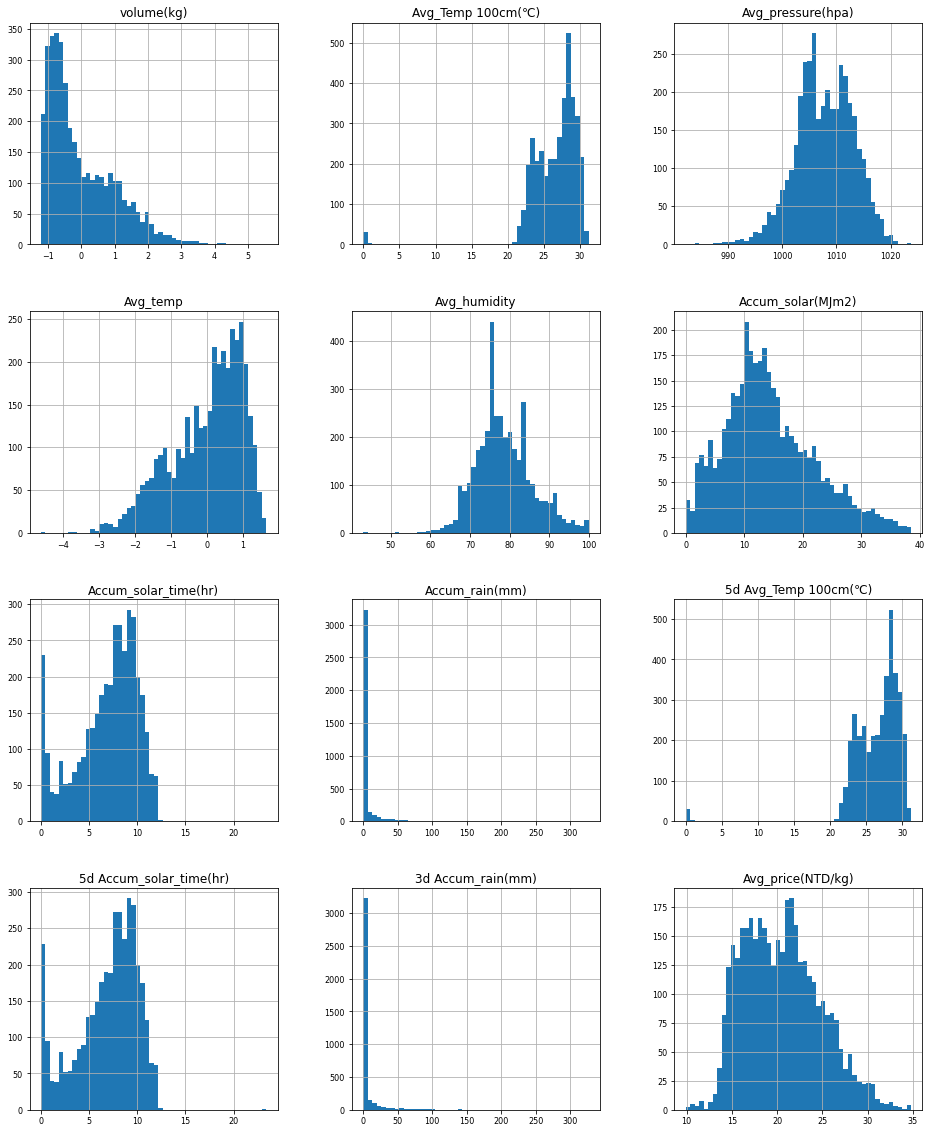

In [11]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

In [12]:
df_num_corr = df_num.corr()["Avg_price(NTD/kg)"][:-1]  # "平均價(元/公斤)"
#df_num_corr
golden_features_list = df_num_corr[abs(df_num_corr) >= 0.].sort_values(ascending=False)
golden_features_list

Avg_temp                   0.249811
5d Avg_Temp 100cm(℃)       0.163826
Avg_Temp 100cm(℃)          0.162706
3d Accum_rain(mm)          0.058221
Accum_rain(mm)             0.050558
Accum_solar(MJm2)         -0.008595
Avg_humidity              -0.015468
volume(kg)                -0.029687
5d Accum_solar_time(hr)   -0.037977
Accum_solar_time(hr)      -0.051714
Avg_pressure(hpa)         -0.187522
Name: Avg_price(NTD/kg), dtype: float64

#### 相關係數（Correlation）

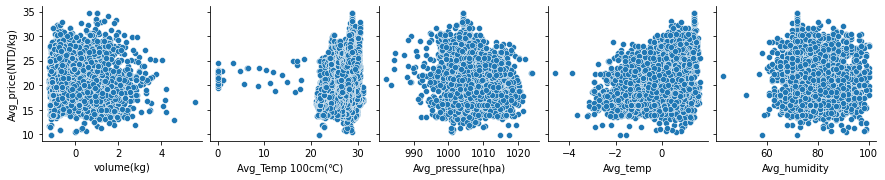

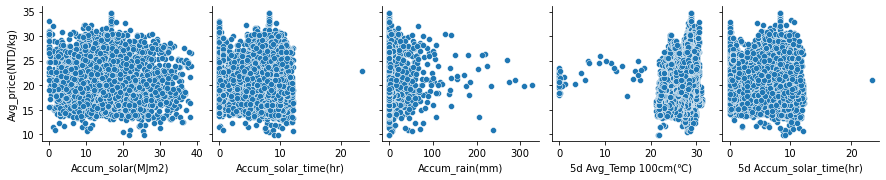

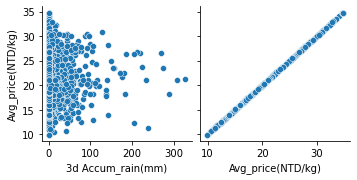

In [13]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num, diag_kind = None,
                x_vars=df_num.columns[i:i+5],
                y_vars=["Avg_price(NTD/kg)"])

### Feature to feature relationship

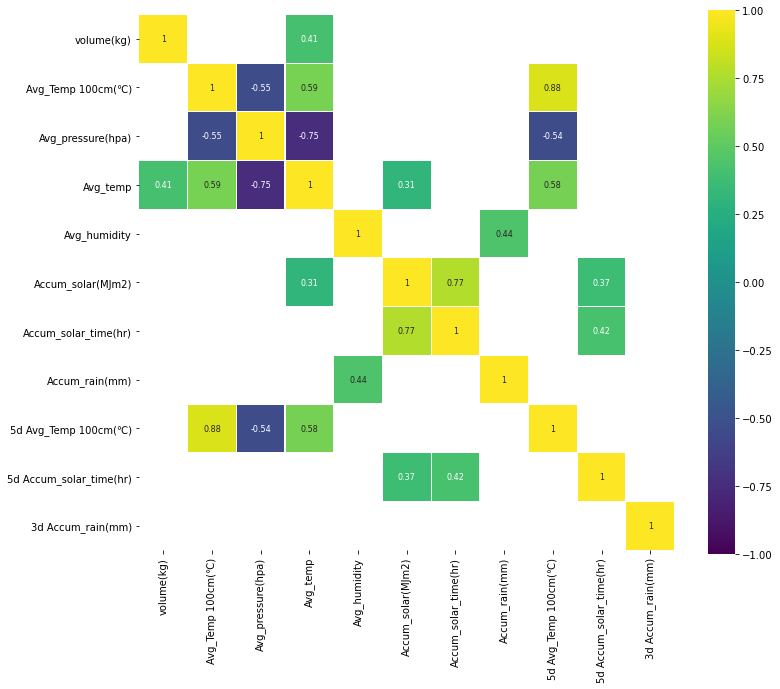

In [14]:
corr = df_num.drop('Avg_price(NTD/kg)', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);

### 時間序列分析

In [15]:
df_pineapple["日期"] = pd.to_datetime(df_pineapple["日期"])

<AxesSubplot:xlabel='日期'>

C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Tibame\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20803 missing 

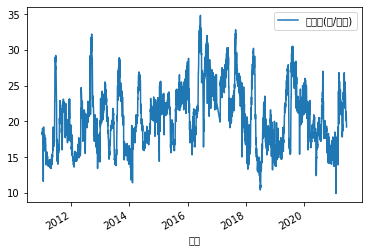

In [16]:
df_pineapple.plot(x="日期", y="平均價(元/公斤)")

In [17]:
df_pineapple.dtypes

日期                datetime64[ns]
產品                        object
平均價(元/公斤)                float64
交易量(公斤)                    int64
平均地溫100cm(℃)             float64
平均氣壓(hPa)                float64
平均氣溫(℃)                  float64
平均相對溼度( %)               float64
累積日射量(MJm2)              float64
累積日照時數(hr)               float64
累計雨量(mm)                 float64
5日平均地溫100cm(℃)           float64
5日平均累積日照時數(hr)           float64
3日累計雨量(mm)               float64
dtype: object